In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans



reg_season_detailed_pd = pd.read_csv('data/RegularSeasonDetailedResults.csv')
reg_season_detailed_2018_pd = pd.read_csv('data/RegularSeasonDetailedResults_Prelim2018.csv')
seasons_pd = pd.read_csv('data/Seasons.csv')
teams_pd = pd.read_csv('data/Teams.csv')
teamList = teams_pd['Team_Name'].tolist()
tourney_compact_pd = pd.read_csv('data/TourneyCompactResults.csv')
tourney_detailed_pd = pd.read_csv('data/TourneyDetailedResults.csv')
tourney_seeds_pd = pd.read_csv('data/TourneySeeds.csv')
tourney_seeds_pd.columns = ['Season', 'Seed', 'Team_Id']
tourney_slots_pd = pd.read_csv('data/TourneySlots.csv')
ncaa_tourney_compact_pd = pd.read_csv('data/NCAATourneyCompactResults.csv')
teams_pd_2 = pd.read_csv('data/Teams-2.csv')
reg_season_detailed_pd.columns

Index(['Season', 'Daynum', 'Wteam', 'Wscore', 'Lteam', 'Lscore', 'Wloc',
       'Numot', 'Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm', 'Wfta', 'Wor', 'Wdr',
       'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf', 'Lfgm', 'Lfga', 'Lfgm3', 'Lfga3',
       'Lftm', 'Lfta', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf'],
      dtype='object')

In [2]:
reg_season_detailed_pd['Wfg%'] = reg_season_detailed_pd['Wfgm'] / reg_season_detailed_pd['Wfga']
reg_season_detailed_pd['Lfg%'] = reg_season_detailed_pd['Lfgm'] / reg_season_detailed_pd['Lfga']
reg_season_detailed_pd['Wfg%3'] = reg_season_detailed_pd['Wfgm3'] / reg_season_detailed_pd['Wfga3']
reg_season_detailed_pd['Lfg%3'] = reg_season_detailed_pd['Lfgm3'] / reg_season_detailed_pd['Lfga3']
reg_season_detailed_pd['Wft%'] = reg_season_detailed_pd['Wftm'] / reg_season_detailed_pd['Wfta']
reg_season_detailed_pd['Lft%'] = reg_season_detailed_pd['Lftm'] / reg_season_detailed_pd['Lfta']

In [3]:
reg_season_detailed_2017_pd = reg_season_detailed_pd[reg_season_detailed_pd['Season'] == 2017]

In [4]:
# bad way of doing thing
# win_team = reg_season_detailed_2017_pd.groupby(['Wteam'], as_index=False).mean()
# win_season_stats = []
# for index, row in win_team.iterrows():
#     win_season_stats.append([row['Wteam'], row['Wscore'], row['Lscore'], row['Wfgm'] / row['Wfga'] * 100, 
#                          row['Wfga'], row['Wfga3'], row['Wfgm3'] / row['Wfga3'] * 100, 
#                          row['Wftm'] / row['Wfta'] * 100, row['Wor'], row['Wdr'],
#                          row['Wast'], row['Wto'], row['Wstl'], row['Wblk'], row['Wpf']])
# win_season_stats = pd.DataFrame(win_season_stats)
# win_season_stats.columns = ['team', 'for', 'against', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk',
#                        'pf']

# lose_team = reg_season_detailed_2017_pd.groupby(['Lteam'], as_index=False).mean()
# lose_season_stats = []
# for index, row in lose_team.iterrows():
#     lose_season_stats.append([row['Lteam'], row['Lscore'], row['Wscore'], row['Lfgm'] / row['Lfga'] * 100, 
#                          row['Lfga'], row['Lfga3'], row['Lfgm3'] / row['Lfga3'] * 100, 
#                          row['Lftm'] / row['Lfta'] * 100, row['Lor'], row['Ldr'],
#                          row['Last'], row['Lto'], row['Lstl'], row['Lblk'], row['Lpf']])

# lose_season_stats = pd.DataFrame(lose_season_stats)
# lose_season_stats.columns = ['team', 'for', 'against', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk',
#                        'pf']
# season_stats = win_season_stats.append(lose_season_stats)
# season_stats = season_stats.groupby(['team'], as_index=False).mean()
# season_stats.shape

In [23]:
winning_df = reg_season_detailed_2017_pd[['Wteam', 'Wscore', 'Lscore', 'Wfgm', 'Wfga', 'Wfg%', 'Wfga3', 'Wfgm3', 'Wfg%3',
                                          'Wftm', 'Wfta', 'Wft%', 'Wor', 'Wdr', 'Wast', 'Wto', 'Wstl', 'Wblk', 'Wpf']]
losing_df = reg_season_detailed_2017_pd[['Lteam', 'Lscore', 'Wscore', 'Lfgm', 'Lfga', 'Lfg%', 'Lfga3', 'Lfgm3', 'Lfg%3',
                                         'Lftm', 'Lfta', 'Lft%', 'Lor', 'Ldr', 'Last', 'Lto', 'Lstl', 'Lblk', 'Lpf']]
winning_df.columns = ['team', 'for', 'against', 'fgm', 'fga', 'fg%', 'fga3', 'fgm3', 'fg%3', 'ftm', 'fta', 'ft%',
                      'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
losing_df.columns = ['team', 'for', 'against', 'fgm', 'fga', 'fg%', 'fga3', 'fgm3', 'fg%3', 'ftm', 'fta', 'ft%',
                     'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
season_stats_df = winning_df
season_stats = season_stats_df.groupby(['team'], as_index=False).mean()
print(season_stats)

     team        for    against        fgm        fga       fg%       fga3  \
0    1101  74.333333  69.666667  24.000000  49.555556  0.485328  18.222222   
1    1102  80.100000  66.700000  26.000000  54.800000  0.476577  20.200000   
2    1103  79.720000  69.840000  26.840000  55.240000  0.487707  26.840000   
3    1104  72.947368  59.000000  24.578947  56.105263  0.438559  21.157895   
4    1105  83.000000  75.000000  27.500000  53.000000  0.518538  19.500000   
5    1106  75.714286  68.000000  25.142857  57.714286  0.440409  21.714286   
6    1107  78.100000  64.300000  27.300000  56.350000  0.484870  14.950000   
7    1108  73.800000  62.933333  25.933333  55.600000  0.468190  20.533333   
8    1110  66.500000  58.625000  24.750000  49.500000  0.506110  13.500000   
9    1111  76.857143  67.000000  24.857143  58.142857  0.429771  24.428571   
10   1112  77.866667  64.166667  26.533333  55.266667  0.480600  17.400000   
11   1113  89.466667  77.066667  29.066667  60.666667  0.477706 

In [24]:
# perform clustering 
%matplotlib inline

num_clusters = 12
# stats to cluster on 
feature_columns = ['for', 'against', 'fga', 'fg%', 'fga3', 'fg%3', 'fta', 'ft%',
                      'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']

cluster_columns = ['for', 'against', 'fg%', 'fg%3'] #best performing model 
to_cluster = season_stats[cluster_columns]

# normalize the stats 
x = to_cluster.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_df = pd.DataFrame(x_scaled)
scaled_df.columns = cluster_columns

# fit kmeans using to_cluster (non-normalized) or scaled_df(normalized)
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(to_cluster)

# extract data about clusters
cluster_map = pd.DataFrame()
cluster_map['Team_Id'] = season_stats.team.values
cluster_map['cluster'] = kmeans.labels_
pairs = []

#create matrix for cluster vs cluster percentages
for i in range(0,num_clusters):
    for j in range(0,num_clusters):
        if(i != j):
            pairs.append([i, j])

percentages = np.zeros((num_clusters,num_clusters))
for pair in pairs:
    cluster_1_wins = reg_season_detailed_2017_pd[
        reg_season_detailed_2017_pd['Wteam'].isin(cluster_map[cluster_map['cluster'] == pair[0]].Team_Id) & 
        reg_season_detailed_2017_pd['Lteam'].isin(cluster_map[cluster_map['cluster'] == pair[1]].Team_Id)
    ]
    cluster_2_wins = reg_season_detailed_2017_pd[
        reg_season_detailed_2017_pd['Wteam'].isin(cluster_map[cluster_map['cluster'] == pair[1]].Team_Id) & 
        reg_season_detailed_2017_pd['Lteam'].isin(cluster_map[cluster_map['cluster'] == pair[0]].Team_Id)
    ]
    percentages[pair[0], pair[1]] = cluster_1_wins.shape[0] / (cluster_1_wins.shape[0] + cluster_2_wins.shape[0])
    percentages[pair[1], pair[0]] = cluster_2_wins.shape[0] / (cluster_1_wins.shape[0] + cluster_2_wins.shape[0])

# get cluster centroids
centers = pd.DataFrame(kmeans.cluster_centers_)
centers.columns = cluster_columns
centers['cluster'] = ['cluster ' + str(i) for i in centers.index]
centers.set_index(['cluster'])
print(centers)
print(pd.DataFrame(percentages))

# get list of teams in each 
mm_teams = tourney_seeds_pd[tourney_seeds_pd['Season'] == 2017].Team_Id.values
mm_team_clusters = cluster_map[cluster_map['Team_Id'].isin(mm_teams)]
cluster_seeds = pd.merge(mm_team_clusters, tourney_seeds_pd[tourney_seeds_pd['Season'] == 2017])
team_cluster_seeds = pd.merge(cluster_seeds, teams_pd)
test = team_cluster_seeds.groupby('cluster')['Team_Name'].apply(lambda x: "%s" % ', '.join(x))
print(cluster_map.groupby(['cluster']).count())

          for    against       fg%      fg%3     cluster
0   80.086278  68.154528  0.481308  0.381667   cluster 0
1   68.255334  58.722022  0.452042  0.361417   cluster 1
2   90.468580  80.972673  0.476356  0.401014   cluster 2
3   75.815720  67.234682  0.470510  0.384637   cluster 3
4   88.843053  71.814855  0.509738  0.412393   cluster 4
5   73.539549  63.806763  0.459009  0.370074   cluster 5
6   83.621217  71.079817  0.491276  0.406375   cluster 6
7   84.444251  75.121642  0.489831  0.408149   cluster 7
8   82.709515  64.098265  0.496094  0.403578   cluster 8
9   73.646855  59.667350  0.471059  0.378778   cluster 9
10  77.782891  63.687415  0.481805  0.382230  cluster 10
11  79.699063  71.204152  0.476908  0.396611  cluster 11
          0         1         2         3         4         5         6   \
0   0.000000  0.701493  0.697674  0.663677  0.487179  0.552083  0.424779   
1   0.298507  0.000000  0.600000  0.503448  0.333333  0.486239  0.315789   
2   0.302326  0.400000  0.00000

In [25]:
# test on 2017 tournament data using cluster vs cluster performance 
tourney_games = ncaa_tourney_compact_pd[ncaa_tourney_compact_pd['Season'] == 2017]
correct_games = 0
incorrect_games = 0
unknown_games = 0
print(cluster_map)
print(tourney_games.shape)
for index, game in tourney_games.iterrows():
    w_team_cluster = cluster_map[cluster_map['Team_Id'] == game['WTeamID']].cluster.values[0]
    l_team_cluster = cluster_map[cluster_map['Team_Id'] == game['LTeamID']].cluster.values[0]
    if percentages[w_team_cluster, l_team_cluster] >= 0.5:
        correct_games = correct_games + 1
    elif percentages [w_team_cluster, l_team_cluster] > 0:
        incorrect_games = incorrect_games + 1
    
print (correct_games, incorrect_games)

     Team_Id  cluster
0       1101        3
1       1102        0
2       1103       11
3       1104        9
4       1105        7
5       1106        3
6       1107       10
7       1108        5
8       1110        1
9       1111        3
10      1112       10
11      1113        2
12      1114        5
13      1115        3
14      1116        6
15      1117        3
16      1119        5
17      1120        6
18      1122        7
19      1123        7
20      1124        9
21      1125        0
22      1126        5
23      1127        5
24      1129        0
25      1130       11
26      1131        3
27      1132       11
28      1133        3
29      1135       11
..       ...      ...
321     1433       10
322     1434       10
323     1435       10
324     1436        9
325     1437       10
326     1438        1
327     1439        6
328     1440        7
329     1441        3
330     1442       11
331     1443        3
332     1444        0
333     1447        1
334     14

In [26]:
# logreg model 

# construct feature matrix, and y vector 
feature_columns = ['for', 'against', 'fga', 'fg%', 'fga3', 'fg%3', 'fta', 'ft%',
                      'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
team_feature_columns = []
for col in feature_columns:
    team_feature_columns.append(col + '1')
for col in feature_columns:
    team_feature_columns.append(col + '2')
feature_matrix = season_stats[feature_columns]
cluster_feature_columns = []
for pair in pairs:
    cluster_feature_columns.append(",".join(str(x) for x in pair))

full_feature_columns = team_feature_columns + cluster_feature_columns
print(full_feature_columns)
outcome = []
feature_matrix = []
diff_feature_matrix = []

for game in reg_season_detailed_2017_pd.itertuples():
    wteam_id = game.Wteam
    lteam_id = game.Lteam
    wteam_cluster = cluster_map[cluster_map['Team_Id'] == wteam_id].cluster.values[0]
    lteam_cluster = cluster_map[cluster_map['Team_Id'] == lteam_id].cluster.values[0]
    wteam_features = season_stats[season_stats['team'] == wteam_id][feature_columns].values
    lteam_features = season_stats[season_stats['team'] == lteam_id][feature_columns].values

    row1_features = np.append(wteam_features,lteam_features)
    row1_cluster = np.zeros((len(cluster_feature_columns), 1))
    cluster_str1 = str(wteam_cluster) + "," + str(lteam_cluster)
    if (wteam_cluster != lteam_cluster):
        row1_cluster[cluster_feature_columns.index(cluster_str1)] = 1
    row1_features = np.append(row1_features, row1_cluster)
    feature_matrix.append(row1_features)
    diff_feature_matrix.append(np.subtract(wteam_features,lteam_features)[0])
    outcome.append(1)
    
    row2_features = np.append(lteam_features,wteam_features)
    row2_cluster = np.zeros((len(cluster_feature_columns), 1))
    cluster_str2 = str(lteam_cluster) + "," + str(wteam_cluster)
    if (wteam_cluster != lteam_cluster):
        row2_cluster[cluster_feature_columns.index(cluster_str2)] = 1
    row2_features = np.append(row2_features, row2_cluster)
    feature_matrix.append(row2_features)
    diff_feature_matrix.append(np.subtract(lteam_features,wteam_features)[0])
    outcome.append(0)

['for1', 'against1', 'fga1', 'fg%1', 'fga31', 'fg%31', 'fta1', 'ft%1', 'or1', 'dr1', 'ast1', 'to1', 'stl1', 'blk1', 'pf1', 'for2', 'against2', 'fga2', 'fg%2', 'fga32', 'fg%32', 'fta2', 'ft%2', 'or2', 'dr2', 'ast2', 'to2', 'stl2', 'blk2', 'pf2', '0,1', '0,2', '0,3', '0,4', '0,5', '0,6', '0,7', '0,8', '0,9', '0,10', '0,11', '1,0', '1,2', '1,3', '1,4', '1,5', '1,6', '1,7', '1,8', '1,9', '1,10', '1,11', '2,0', '2,1', '2,3', '2,4', '2,5', '2,6', '2,7', '2,8', '2,9', '2,10', '2,11', '3,0', '3,1', '3,2', '3,4', '3,5', '3,6', '3,7', '3,8', '3,9', '3,10', '3,11', '4,0', '4,1', '4,2', '4,3', '4,5', '4,6', '4,7', '4,8', '4,9', '4,10', '4,11', '5,0', '5,1', '5,2', '5,3', '5,4', '5,6', '5,7', '5,8', '5,9', '5,10', '5,11', '6,0', '6,1', '6,2', '6,3', '6,4', '6,5', '6,7', '6,8', '6,9', '6,10', '6,11', '7,0', '7,1', '7,2', '7,3', '7,4', '7,5', '7,6', '7,8', '7,9', '7,10', '7,11', '8,0', '8,1', '8,2', '8,3', '8,4', '8,5', '8,6', '8,7', '8,9', '8,10', '8,11', '9,0', '9,1', '9,2', '9,3', '9,4', '9,5', '9

In [27]:
test_outcome = []
test_feature_matrix = []
diff_test_feature_matrix = []

tourney_games = ncaa_tourney_compact_pd[ncaa_tourney_compact_pd['Season'] == 2017]

for game in tourney_games.itertuples():
    wteam_id = game.WTeamID
    lteam_id = game.LTeamID
    team_cluster = cluster_map[cluster_map['Team_Id'] == wteam_id].cluster.values[0]
    lteam_cluster = cluster_map[cluster_map['Team_Id'] == lteam_id].cluster.values[0]
    wteam_features = season_stats[season_stats['team'] == wteam_id][feature_columns].values
    lteam_features = season_stats[season_stats['team'] == lteam_id][feature_columns].values
    
    row1_features = np.append(wteam_features,lteam_features)
    row1_cluster = np.zeros((len(cluster_feature_columns), 1))
    cluster_str1 = str(wteam_cluster) + "," + str(lteam_cluster)
    if (wteam_cluster != lteam_cluster):
        row1_cluster[cluster_feature_columns.index(cluster_str1)] = 1
    row1_features = np.append(row1_features, row1_cluster)
    test_feature_matrix.append(row1_features)
    diff_test_feature_matrix.append(np.subtract(wteam_features,lteam_features)[0])
    test_outcome.append(1)

In [28]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import numpy as np
logreg = LogisticRegression()
rfe = RFE(logreg, 123)
rfe = rfe.fit(feature_matrix,outcome)
print(rfe.support_)
print(rfe.ranking_)
features_rfe = []; 
for i in range(len(rfe.support_)):
    if np.any(rfe.support_[i]):
        features_rfe.append(full_feature_columns[i])

print(features_rfe)
#features_rfe = pd.DataFrame(rfe.support_[0])
#features_rfe.columns = full_feature_columns

[ True  True False  True False  True False False False  True False False
  True  True  True  True  True False  True False  True False False False
  True False False False  True  True  True  True False  True  True  True
  True  True False  True  True  True  True  True  True False  True  True
 False  True False  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True False  True False
  True  True  True  True  True  True  True  True False  True False  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False  True  True  True  True False  True  True False
  True  True  True  True  True  True  True False  True False  True  True
 False False  True  True  True  True False  True  True False  True  True
  True  True  True False False False  True  True  True  True  True  True
  True  True  True  True  True  True]
[ 1  1 37  1 

In [31]:
custom_columns = ['for1', 'fg%1', 'fg%31', 'or1', 'dr1', 
                  'for2', 'fg%2', 'fg%32', 'or2', 'dr2']

features_df = pd.DataFrame(feature_matrix)
features_df.columns = full_feature_columns
sub_features_matrix = features_df[full_feature_columns].values

test_feature_pd = pd.DataFrame(test_feature_matrix)
test_feature_pd.columns = full_feature_columns
sub_test_feature_matrix = test_feature_pd[full_feature_columns].values

# diff_features_df = pd.DataFrame(diff_feature_matrix)
# diff_features_df.columns = feature_columns
# diff_sub_features_matrix = diff_features_df[feature_columns].values

# diff_test_feature_pd = pd.DataFrame(diff_test_feature_matrix)
# diff_test_feature_pd.columns = feature_columns
# diff_sub_test_feature_matrix = diff_test_feature_pd[feature_columns].values

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression



x_train, x_test, y_train, y_test = train_test_split(sub_features_matrix, outcome, test_size=0.33, random_state=42)
logreg = LogisticRegression(C=100, penalty='l1', random_state=42)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.10f}'.format(logreg.score(sub_test_feature_matrix, test_outcome)))

Accuracy of logistic regression classifier on test set: 0.7462686567


In [22]:
matchups = pd.read_csv('data/SampleSubmission.csv')
list_matchups = []
for game in matchups.itertuples():
    year,team1_id,team2_id = game.Id.split("_")
    team1_cluster = cluster_map[cluster_map['Team_Id'] == int(team1_id)].cluster.values[0]
    team2_cluster = cluster_map[cluster_map['Team_Id'] == int(team2_id)].cluster.values[0]
    team1_features = season_stats[season_stats['team'] == int(team1_id)][feature_columns].values
    team2_features = season_stats[season_stats['team'] == int(team2_id)][feature_columns].values
    
    row_features = np.append(team1_features,team2_features)
    row_cluster = np.zeros((len(cluster_feature_columns), 1))
    cluster_str = str(team1_cluster) + "," + str(team2_cluster)
    if (team1_cluster != team2_cluster):
        row_cluster[cluster_feature_columns.index(cluster_str)] = 1
    row_features = np.append(row_features, row_cluster)
    prob = logreg.predict_proba([row_features])[0][1]
    list_matchups.append([game.Id, prob])

submission = pd.DataFrame(list_matchups, columns=matchups.columns)
submission.to_csv('data/Submission.csv', index=False)

In [13]:
logreg.predict(sub_test_feature_matrix)
proba = logreg.predict_proba(sub_test_feature_matrix)
diff_arr = logreg.predict(sub_test_feature_matrix) - test_outcome
y_pred_proba = []
for index, game in enumerate(tourney_games.itertuples()):
    if diff_arr[index] != 0:
        team_1 = teams_pd[teams_pd['Team_Id'] == game.WTeamID]['Team_Name'].values[0]
        team_2 = teams_pd[teams_pd['Team_Id'] == game.LTeamID]['Team_Name'].values[0]
        print(team_1, team_2, logreg.predict_proba(sub_test_feature_matrix)[index])
    y_pred_proba.append(proba[index][0])
print(test_outcome)

NameError: name 'logreg' is not defined

In [14]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(max_depth=1000, n_estimators=120)
# Train the model on training data
x_train, x_test, y_train, y_test = train_test_split(sub_features_matrix, outcome, test_size=0.33, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf.score(sub_test_feature_matrix, test_outcome)))

NameError: name 'train_test_split' is not defined

In [15]:
diff_arr = rf.predict(sub_test_feature_matrix) - test_outcome
for index, game in enumerate(tourney_games.itertuples()):
    if diff_arr[index] != 0:
        team_1 = teams_pd[teams_pd['Team_Id'] == game.WTeamID]['Team_Name'].values[0]
        team_2 = teams_pd[teams_pd['Team_Id'] == game.LTeamID]['Team_Name'].values[0]
        print(team_1, team_2)

NameError: name 'sub_test_feature_matrix' is not defined

In [16]:
lr_pred = logreg.predict_proba(sub_test_feature_matrix)
rf_pred = rf.predict_proba(sub_test_feature_matrix)
for index, item in enumerate(lr_pred):
    print(lr_pred[index], rf)

NameError: name 'logreg' is not defined

In [17]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
x_train, x_test, y_train, y_test = train_test_split(sub_features_matrix, outcome, test_size=0.33, random_state=42)
neigh.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('Accuracy of knn classifier on test set: {:.2f}'.format(neigh.score(sub_test_feature_matrix, test_outcome)))

NameError: name 'train_test_split' is not defined

In [18]:
coef_df = pd.DataFrame(logreg.coef_)
coef_df.columns = full_feature_columns
print(coef_df.head())

NameError: name 'logreg' is not defined

In [19]:
scaled_df.columns = ['score', 'fg%', 'fga', 'fga3', 'fg3%', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk',
                       'pf']

data_label = scaled_df.join(cluster_map)
print(data_label.shape)
plt.figure(0)
plt.scatter(season_stats['team'], season_stats['score'])
plt.figure(1)
plt.scatter(data_label['score'], data_label['fg%'], c=data_label.cluster)
plt.xlabel('score')
plt.ylabel('fga')

ValueError: Length mismatch: Expected axis has 4 elements, new values have 13 elements

In [20]:
reg_season_detailed_pd.groupby(['Season'], as_index=False).mean()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Numot,Wfgm,Wfga,Wfgm3,...,Lto,Lstl,Lblk,Lpf,Wfg%,Lfg%,Wfg%3,Lfg%3,Wft%,Lft%
0,2003,74.808709,1285.591854,75.795061,1281.750867,63.756932,0.061308,26.299393,55.367851,6.695624,...,15.602903,6.507582,2.768198,20.413128,0.476635,0.403678,0.384372,0.309846,0.708467,0.671526
1,2004,75.335156,1285.931306,74.971122,1280.900678,62.990155,0.071319,25.928681,55.069350,6.708160,...,15.654999,6.493984,2.741413,20.322468,0.472597,0.402428,0.381383,0.308216,0.702918,0.664356
2,2005,75.042567,1286.067166,74.693690,1282.088770,62.635294,0.066524,25.975187,54.949305,6.769840,...,15.490481,6.509733,2.806203,19.884492,0.474548,0.401843,0.381509,0.309263,0.700028,0.667886
3,2006,74.712634,1283.769182,74.587555,1285.425478,62.666597,0.073996,25.920538,54.881228,6.845281,...,15.521127,6.368089,2.836872,19.679210,0.473969,0.403535,0.382577,0.312527,0.707202,0.667626
4,2007,71.676780,1286.476700,74.829467,1283.896887,62.761650,0.067618,25.896887,54.196907,7.043228,...,15.218917,6.225858,2.760658,19.985524,0.479336,0.403821,0.386768,0.309334,0.703628,0.670486
5,2008,68.392020,1288.741817,74.962425,1281.907418,62.755375,0.072439,25.932597,54.543289,7.162309,...,15.173155,6.171025,2.836529,19.803021,0.477028,0.402445,0.388985,0.311987,0.705552,0.671290
6,2009,70.963612,1287.680511,74.033721,1281.312250,61.980377,0.071633,25.724138,54.550200,6.749095,...,14.696895,6.093161,2.777481,19.574776,0.473112,0.398755,0.379093,0.304498,0.703333,0.667236
7,2010,70.741212,1289.607638,74.652480,1279.997910,62.484325,0.063272,25.799734,54.756603,6.655330,...,14.431693,6.137374,2.888087,19.872126,0.472647,0.396447,0.378285,0.303391,0.702655,0.668285
8,2011,70.881243,1285.244758,74.374190,1283.078727,62.470644,0.077964,25.600839,54.468547,6.733321,...,14.131910,5.933283,2.961685,20.081395,0.471347,0.399565,0.377837,0.307906,0.706979,0.670169
9,2012,70.745479,1286.596802,73.379973,1283.055778,61.415953,0.070055,25.409100,53.963640,6.744146,...,14.128308,5.935656,2.888445,19.396916,0.472501,0.398608,0.381693,0.302928,0.705750,0.669384


Text(0,0.5,'3 fg%')

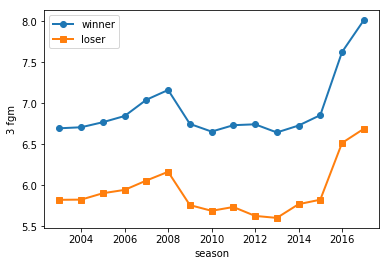

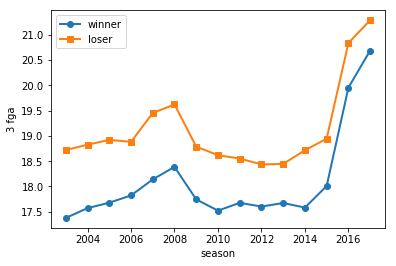

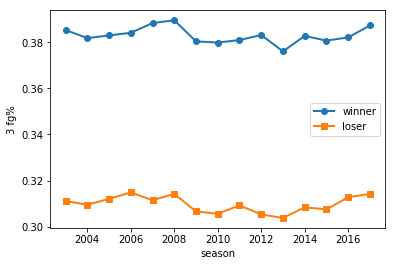

In [21]:

season_groupby = reg_season_detailed_pd.groupby(['Season'], as_index=False).mean()
#literature review, problem statement clearer, clusters, properties 
%matplotlib inline
plt.figure(0)
plt.plot(season_groupby['Season'], season_groupby['Wfgm3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('3 fgm')
plt.figure(1)
plt.plot(season_groupby['Season'], season_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfga3'], label='loser', lw=2, marker='s') 
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('3 fga')
plt.figure(2)
plt.plot(season_groupby['Season'], season_groupby['Wfgm3']/season_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm3']/season_groupby['Lfga3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('3 fg%')

Text(0,0.5,'fg%')

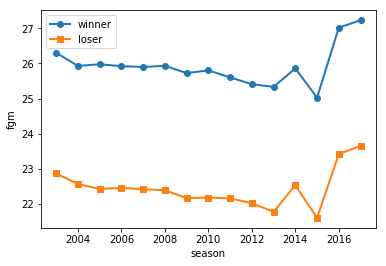

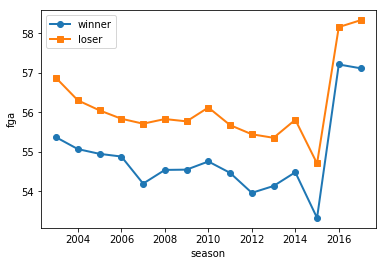

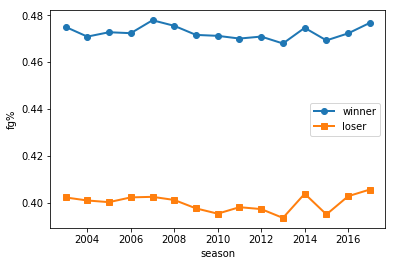

In [22]:
season_groupby = reg_season_detailed_pd.groupby(['Season'], as_index=False).mean()
#literature review, problem statement clearer, clusters, properties 
%matplotlib inline
plt.figure(0)
plt.plot(season_groupby['Season'], season_groupby['Wfgm'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fgm')
plt.figure(1)
plt.plot(season_groupby['Season'], season_groupby['Wfga'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfga'], label='loser', lw=2, marker='s') 
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fga')
plt.figure(2)
plt.plot(season_groupby['Season'], season_groupby['Wfgm']/season_groupby['Wfga'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm']/season_groupby['Lfga'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%')

In [ ]:
%matplotlib inline
plt.figure(0)
plt.plot(season_groupby['Season'], season_groupby['Wfgm'] - season_groupby['Wfgm3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm'] - season_groupby['Lfgm3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('2 fgm')
plt.figure(1)
plt.plot(season_groupby['Season'], season_groupby['Wfga'] - season_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfga'] - season_groupby['Lfga3'], label='loser', lw=2, marker='s') 
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('2 fga')
plt.figure(2)
plt.plot(season_groupby['Season'], (season_groupby['Wfgm'] - season_groupby['Wfgm3'])/(season_groupby['Wfga'] - season_groupby['Wfga3']), label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], (season_groupby['Lfgm'] - season_groupby['Lfgm3'])/(season_groupby['Lfga'] - season_groupby['Lfga3']), label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('2 fg%')

In [ ]:
%matplotlib inline
plt.figure(0)
plt.plot(season_groupby['Season'], season_groupby['Wscore'], label='data1', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lscore'], label='data2', lw=2, marker='s')

In [ ]:
%matplotlib inline
columns = ['score', 'fgm', 'fga', 'fgm3', 'fga3', 'ftm', 'fta', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
for index, col in enumerate(columns):
    plt.figure(index)
    plt.plot(season_groupby['Season'], season_groupby['W' + col], label='winner', lw=2, marker='o')
    plt.plot(season_groupby['Season'], season_groupby['L' + col], label='loser', lw=2, marker='s')
    plt.legend(loc='best')
    plt.xlabel('season')
    plt.ylabel(col)
    
plt.figure(index + 1)
plt.plot(season_groupby['Season'], season_groupby['Wfgm'] - season_groupby['Wfgm3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm'] - season_groupby['Lfgm3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fgm2')
plt.figure(index + 2)
plt.plot(season_groupby['Season'], season_groupby['Wfga'] - season_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfga'] - season_groupby['Lfga3'], label='loser', lw=2, marker='s') 
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fga2')
plt.figure(index + 3)
plt.plot(season_groupby['Season'], (season_groupby['Wfgm'] - season_groupby['Wfgm3'])/(season_groupby['Wfga'] - season_groupby['Wfga3']), label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], (season_groupby['Lfgm'] - season_groupby['Lfgm3'])/(season_groupby['Lfga'] - season_groupby['Lfga3']), label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%2')
plt.figure(index + 4)
plt.plot(season_groupby['Season'], season_groupby['Wfgm']/season_groupby['Wfga'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm']/season_groupby['Lfga'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%')
plt.figure(index + 5)
plt.plot(season_groupby['Season'], season_groupby['Wfgm3']/season_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm3']/season_groupby['Lfga3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%3')
plt.figure(index + 6)
plt.plot(season_groupby['Season'], season_groupby['Wftm']/season_groupby['Wfta'], label='winner', lw=2, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lftm']/season_groupby['Lfta'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('ft%')

In [ ]:
%matplotlib inline
tournament_groupby = tourney_detailed_pd.groupby(['Season'], as_index=False).mean()
columns = ['score', 'fgm', 'fga', 'fgm3', 'fga3', 'ftm', 'fta', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
for index, col in enumerate(columns):
    plt.figure(index)
    plt.plot(tournament_groupby['Season'], tournament_groupby['W' + col], label='winner', lw=2, marker='o')
    plt.plot(tournament_groupby['Season'], tournament_groupby['L' + col], label='loser', lw=2, marker='s')
    plt.legend(loc='best')
    plt.xlabel('season')
    plt.ylabel(col)
    
plt.figure(index + 1)
plt.plot(tournament_groupby['Season'], tournament_groupby['Wfgm'] - tournament_groupby['Wfgm3'], label='winner', lw=2, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Lfgm'] - tournament_groupby['Lfgm3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fgm2')
plt.figure(index + 2)
plt.plot(tournament_groupby['Season'], tournament_groupby['Wfga'] - tournament_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Lfga'] - tournament_groupby['Lfga3'], label='loser', lw=2, marker='s') 
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fga2')
plt.figure(index + 3)
plt.plot(tournament_groupby['Season'], (tournament_groupby['Wfgm'] - tournament_groupby['Wfgm3'])/(tournament_groupby['Wfga'] - tournament_groupby['Wfga3']), label='winner', lw=2, marker='o')
plt.plot(tournament_groupby['Season'], (tournament_groupby['Lfgm'] - tournament_groupby['Lfgm3'])/(tournament_groupby['Lfga'] - tournament_groupby['Lfga3']), label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%2')
plt.figure(index + 4)
plt.plot(tournament_groupby['Season'], tournament_groupby['Wfgm']/tournament_groupby['Wfga'], label='winner', lw=2, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Lfgm']/tournament_groupby['Lfga'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%')
plt.figure(index + 5)
plt.plot(tournament_groupby['Season'], tournament_groupby['Wfgm3']/tournament_groupby['Wfga3'], label='winner', lw=2, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Lfgm3']/tournament_groupby['Lfga3'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('fg%3')
plt.figure(index + 6)
plt.plot(tournament_groupby['Season'], tournament_groupby['Wftm']/tournament_groupby['Wfta'], label='winner', lw=2, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Lftm']/tournament_groupby['Lfta'], label='loser', lw=2, marker='s')
plt.legend(loc='best')
plt.xlabel('season')
plt.ylabel('ft%')

In [ ]:
plt.figure(1)
plt.plot(season_groupby['Season'], season_groupby['Wfgm']/season_groupby['Wfga'], label='winner regular season', color='green', lw=1, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Wfgm']/tournament_groupby['Wfga'], label='winner tournament', color='blue', lw=1, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm']/season_groupby['Lfga'], label='loser regular season', color='red', lw=1, marker='o')
plt.plot(tournament_groupby['Season'], tournament_groupby['Lfgm']/tournament_groupby['Lfga'], label='winner tournament', color='orange', lw=1, marker='o')
plt.legend(loc='best')
plt.title('Fields Goal Percentage by Season')
plt.xlabel('season')
plt.ylabel('fg%')
plt.figure(2)
plt.plot(season_groupby['Season'], season_groupby['Wfgm3']/season_groupby['Wfga3'], label='winner', color="green", lw=1, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm3']/season_groupby['Lfga3'], label='loser', color="red", lw=1, marker='o')
plt.legend(loc='best')
plt.title('3 Point Field Goal Percentage by Season')
plt.xlabel('season')
plt.ylabel('fg%3')
plt.figure(3)
plt.plot(season_groupby['Season'], season_groupby['Wfgm3'], label='winner', color="green", lw=1, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfgm3'], label='loser', color="red", lw=1, marker='o')
plt.legend(loc='best')
plt.title('3 Point Field Goals Made by Season')
plt.xlabel('season')
plt.ylabel('fgm3')
plt.figure(4)
plt.plot(season_groupby['Season'], season_groupby['Wfga3'], label='winner', color="green", lw=1, marker='o')
plt.plot(season_groupby['Season'], season_groupby['Lfga3'], label='loser', color="red", lw=1, marker='o')
plt.legend(loc='best')
plt.title('3 Point Field Goals Attempted by Season')
plt.xlabel('season')
plt.ylabel('fga3')

In [ ]:
reg_season_detailed_years_pd = reg_season_detailed_pd[reg_season_detailed_pd['Season'].isin(['2017','2016','2015'])]
columns = ['score', 'fgm', 'fga', 'fg%', 'fgm3', 'fga3', 'fg%3', 'fgm2', 'fga2', 'fg%2',
           'ftm', 'fta', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
new_cols = []
for col in columns:
    new_cols.append("W" + col)
    new_cols.append("L" + col)
reg_season_detailed_years_pd['Wfgm2'] = reg_season_detailed_years_pd['Wfgm'] - reg_season_detailed_years_pd['Wfgm3']
reg_season_detailed_years_pd['Wfga2'] = reg_season_detailed_years_pd['Wfga'] - reg_season_detailed_years_pd['Wfga3']
reg_season_detailed_years_pd['Wfg%2'] = reg_season_detailed_years_pd['Wfgm2']/reg_season_detailed_years_pd['Wfga2']
reg_season_detailed_years_pd['Lfgm2'] = reg_season_detailed_years_pd['Lfgm'] - reg_season_detailed_years_pd['Lfgm3']
reg_season_detailed_years_pd['Lfga2'] = reg_season_detailed_years_pd['Lfga'] - reg_season_detailed_years_pd['Lfga3']
reg_season_detailed_years_pd['Lfg%2'] = reg_season_detailed_years_pd['Lfgm2']/reg_season_detailed_years_pd['Lfga2']
reg_season_detailed_years_pd['Wfg%'] = reg_season_detailed_years_pd['Wfgm']/reg_season_detailed_years_pd['Wfga']
reg_season_detailed_years_pd['Lfg%'] = reg_season_detailed_years_pd['Lfgm']/reg_season_detailed_years_pd['Lfga']
reg_season_detailed_years_pd['Wfg%3'] = reg_season_detailed_years_pd['Wfgm3']/reg_season_detailed_years_pd['Wfga3']
reg_season_detailed_years_pd['Lfg%3'] = reg_season_detailed_years_pd['Lfgm3']/reg_season_detailed_years_pd['Lfga3']
reg_season_detailed_years_pd['Wft%'] = reg_season_detailed_years_pd['Wftm']/reg_season_detailed_years_pd['Wfta']
reg_season_detailed_years_pd['Lft%'] = reg_season_detailed_years_pd['Lftm']/reg_season_detailed_years_pd['Lfta']
reg_season_detailed_years_pd = reg_season_detailed_years_pd.fillna(0)
x = reg_season_detailed_years_pd[new_cols].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

tournament_detailed_years_pd = tourney_detailed_pd[tourney_detailed_pd['Season'].isin(['2017','2016','2015'])]
columns = ['score', 'fgm', 'fga', 'fg%', 'fgm3', 'fga3', 'fg%3', 'fgm2', 'fga2', 'fg%2',
           'ftm', 'fta', 'ft%', 'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf']
new_cols = []
for col in columns:
    new_cols.append("W" + col)
    new_cols.append("L" + col)
tournament_detailed_years_pd['Wfgm2'] = tournament_detailed_years_pd['Wfgm'] - tournament_detailed_years_pd['Wfgm3']
tournament_detailed_years_pd['Wfga2'] = tournament_detailed_years_pd['Wfga'] - tournament_detailed_years_pd['Wfga3']
tournament_detailed_years_pd['Wfg%2'] = tournament_detailed_years_pd['Wfgm2']/tournament_detailed_years_pd['Wfga2']
tournament_detailed_years_pd['Lfgm2'] = tournament_detailed_years_pd['Lfgm'] - tournament_detailed_years_pd['Lfgm3']
tournament_detailed_years_pd['Lfga2'] = tournament_detailed_years_pd['Lfga'] - tournament_detailed_years_pd['Lfga3']
tournament_detailed_years_pd['Lfg%2'] = tournament_detailed_years_pd['Lfgm2']/tournament_detailed_years_pd['Lfga2']
tournament_detailed_years_pd['Wfg%'] = tournament_detailed_years_pd['Wfgm']/tournament_detailed_years_pd['Wfga']
tournament_detailed_years_pd['Lfg%'] = tournament_detailed_years_pd['Lfgm']/tournament_detailed_years_pd['Lfga']
tournament_detailed_years_pd['Wfg%3'] = tournament_detailed_years_pd['Wfgm3']/tournament_detailed_years_pd['Wfga3']
tournament_detailed_years_pd['Lfg%3'] = tournament_detailed_years_pd['Lfgm3']/tournament_detailed_years_pd['Lfga3']
tournament_detailed_years_pd['Wft%'] = tournament_detailed_years_pd['Wftm']/tournament_detailed_years_pd['Wfta']
tournament_detailed_years_pd['Lft%'] = tournament_detailed_years_pd['Lftm']/tournament_detailed_years_pd['Lfta']
tournament_detailed_years_pd = tournament_detailed_years_pd.fillna(0)
x_1 = tournament_detailed_years_pd[new_cols].values
min_max_scaler = preprocessing.MinMaxScaler()
x_1_scaled = min_max_scaler.fit_transform(x_1)

x_mean = np.mean(x_scaled, axis=0)
x_1_mean = np.mean(x_1_scaled, axis=0)
x_diff = x_mean - x_1_mean 
print(x_diff)
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(x_scaled)


In [ ]:
from pandas.tools.plotting import scatter_matrix
print(scaled_df)
scatter_matrix(scaled_df, alpha=0.2, figsize=(6, 6), diagonal='kde')